In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.head(7)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889


In [6]:
df.Height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [7]:
df.Weight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [8]:
df[5:7]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889


In [9]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [10]:
df.Height.mean()

69.02441087268797

In [11]:
df.Weight.mean()

186.89125797946284

In [13]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [15]:
df.Height.std()

2.8585833281420983

In [16]:
df.shape

(3501, 2)

In [18]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Vizualisation 

Text(0.5, 1.0, 'Weight plot')

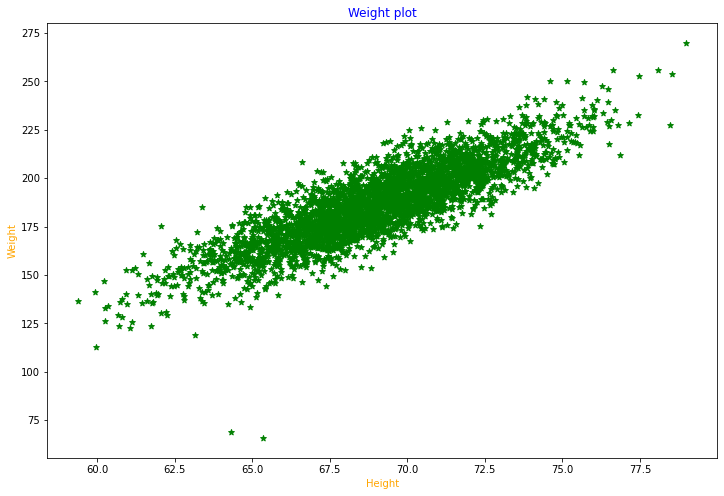

In [19]:

plt.figure(figsize=(12,8))
plt.scatter(df.Height, df.Weight,marker='*',color='green')
plt.xlabel('Height', color='orange')
plt.ylabel('Weight', color='orange')
plt.title('Weight plot', color = 'blue')

In [20]:
x = df[['Height']]
y = df['Weight']

In [21]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the dataste into train and test

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .30)

In [24]:
xtrain.head()

,Height
2460,69.224115
2337,69.576572
418,68.679874
2527,60.269108
426,60.748118


In [25]:
ytrain.head()

2460    167.738248
2337    192.466355
418     196.151623
2527    126.455613
426     136.167866
Name: Weight, dtype: float64

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
m = reg.coef_
m

array([6.00781305])

In [30]:
c=reg.intercept_
c

-227.7292375907578

In [31]:
x1 = 2100
y = m*x1+c

In [32]:
y

array([12388.67817639])

In [33]:
reg.predict([[69.224115]])

C:\Users\Syed Sabbir Rahman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([188.15630418])

In [34]:
pred = reg.predict(xtest)

In [35]:
df['predicted result']=reg.predict(x)

In [36]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.929835
1,68.781904,162.310473,185.499583
2,74.110105,212.740856,217.510421
3,71.730978,220.042470,203.217071
4,69.881796,206.349801,192.107528


In [38]:
x1=73.847017
y=m*x1+c
y

array([215.92983516])

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mse = mean_squared_error(ytest, pred)

In [41]:
mse

106.35872205512779

# Best fit line

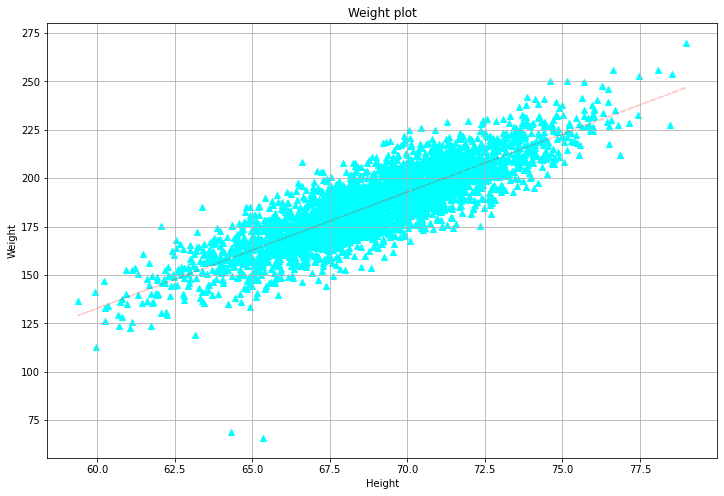

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,color='cyan',marker='^')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight plot",color='Black')
plt.grid()
plt.plot(xtrain.squeeze() , reg.predict(xtrain),'r--',alpha=0.2)

In [48]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[73.847017]])

array([215.92983516])

In [49]:
reg.score(xtest, ytest)

0.7154620982275393

In [50]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7154620982275393